### Recurrent Neural Network

순환 신경망을 이용한 Sequence Data Modeling

#### Sequence Data
- 순서를 고려한 데이터
- 원소들이 특정한 순서를 가지며 상호 독립적이지 않다
- 시퀀스 데이터의 좋은 예는 시계열 데이터이다

<center><img src="https://miro.medium.com/max/1400/1*aIT6tmnk3qHpStkOX3gGcQ.png" alt="My Image"></center>

#### 시퀀스 모델링의 종류

- **Many to One** : 입력 데이터는 시퀀스, 출력은 벡터 (ex : 감성분석 - 입력은 텍스트, 출력은 label)
- **One to Many** : 입력 데이터는 일반적인 형태, 출력은 시퀀스 (ex : 이미지 캡셔닝 - 입력은 이미지, 출력이 모두 시퀀스)
- **Many to Many** : 입력, 출력이 모두 시퀀스인 모형
    - 입력과 출력이 동기적인지 아닌지에 따라 나눠짐
    - 동기적 모델– 각 프레임이 레이블되어 있는 비디오 분류
    - 비동기적 모델– 한 언어에서 다른 언어로 번역 작업


#### RNN Network

$$\mathbf{z}_h^{(t)} = \mathbf{W}_{xh}\mathbf{x}^{(t)} + \mathbf{W}_{hh}\mathbf{h}^{(t-1)} + \mathbf{b}_h$$
$$\mathbf{h}^{(t)} = \phi_h \Big( \mathbf{z}_h^{(t)}\Big) = \phi_h \Big( \mathbf{W}_{xh} \mathbf{x}^{(t)} + \mathbf{W}_{hh}\mathbf{h}^{(t-1)} + \mathbf{b}_h\Big)$$
$$\mathbf{h}^{(t)} = \phi_h \Big( 
\begin{bmatrix}
\mathbf{W}_{xh} ; \mathbf{W}_{hh}
\end{bmatrix}
\begin{bmatrix}
\mathbf{x}^{(t)} \\
\mathbf{h}^{(t-1)} \\
\end{bmatrix}
 + \mathbf{b}_h \Big)$$

$$\mathbf{Ax} = \begin{bmatrix}
\mathbf{a}_1 & \cdots & \mathbf{a}_2
\end{bmatrix}
\begin{bmatrix}
\mathbf{x}_{1} \\
\vdots \\
\mathbf{x}_{n} \\
\end{bmatrix} = 
\mathbf{x}_{1}\mathbf{a}_{1} + \mathbf{x}_{2}\mathbf{a}_{2} + \cdots + \mathbf{x}_{n}\mathbf{a}_{n}$$

**Sequence Gradient Problem**

$$\frac{\partial L^{(t)}}{\partial \mathbf{W}_{hh}} = 
\frac{\partial L^{(t)}}{\partial \mathbf{y}^{(t)}} \cdot \frac{\partial \mathbf{y}^{(t)}}{\partial \mathbf{h}^{(t)}} \cdot 
\Big( \sum_{k=1}^t \frac{\partial \mathbf{h}^{(t)}}{{\partial \mathbf{h}^{(k)}}}
\cdot \frac{\partial \mathbf{h}^{(t)}}{{\partial \mathbf{W}_{(hh)}}}\Big)$$

#### Long Short Term Memory (LSTM)
- LSTM은 그래디언트 소실 문제를 극복하기 위해 소개됨
- 기본 구성 요소는 은닉층을 의미하는 memory cell
- 그래디언트 소실, 폭주 문제 해결을 위해 각 메모리셀에 적절한 가중치 w=1을 유지하는 순환에지가 존재, 이 순환에지의 출력을 cell state라고 함.
- 세종류의 게이트 : 삭제게이트, 입력게이트, 출력게이트가 있음

**forgot gate**

$$\mathbf{g}_t = \sigma\Big( 
\mathbf{W}_{(xf)} \mathbf{x}^{(t)} + \mathbf{W}_{(hf)} \mathbf{h}^{(t-1)} + \mathbf{b}_{f}
\Big)$$

**input gate**

$$\mathbf{i}_t = \sigma\Big( 
\mathbf{W}_{(xi)} \mathbf{x}^{(t)} + \mathbf{W}_{(hi)} \mathbf{h}^{(t-1)} + \mathbf{b}_{i}
\Big)$$

**input note**

$$\mathbf{g}_t = \tanh\Big( 
\mathbf{W}_{(xg)} \mathbf{x}^{(t)} + \mathbf{W}_{(hg)} \mathbf{h}^{(t-1)} + \mathbf{b}_{g}
\Big)$$

**cell gate**

$$\mathbf{C}^{(t)} = \Big( 
\mathbf{C}^{(t-1)}\odot \mathbf{f}_t
\Big) \oplus (\mathbf{i}_t \odot \mathbf{g}_t)$$

**output gate**

$$\mathbf{o}_t = \sigma\Big( 
\mathbf{W}_{(xo)} \mathbf{x}^{(t)} + \mathbf{W}_{(ho)} \mathbf{h}^{(t-1)} + \mathbf{b}_{o}
\Big)$$

**hidden gate**

$$\mathbf{h}_t = \mathbf{o}_t \odot \tanh\Big( 
\mathbf{C}^{(t)}
\Big)$$

주어진 결과를 가지고 현재의 타임 스텝에서 은닉 유닛의 출력을 위와 같이 계산한다

#### 다층 RNN을 이용한 영화리뷰 감성 분석

언어 모델링을 위한 다대다 RNN 구현

**전처리 단계**
- 전체 데이터 셋에서 고유한 단어를 찾은 후 각 단어를 정수값으로 인코딩
- 모든 시퀀스가 동일한 길이를 가져야 하므로 sequence_lengt 파라미터를 정의하고 200으로 설정
- 200개보다 적은 시퀀스는 왼쪽에 0을 패딩, 긴 시퀀스는 마지막 200개만 사용하도록 잘라 냄

**특성 변환을 단어별 원− 핫 인코딩을 사용하는 경우**

- 고유한 단어의 수가 2만개라면 입력 특성 개수는 2만개가 됨
- 차원의 저주로 인한 영향을 받음

**임베딩 기법을 사용한 특성변환**
- 각 단어를 실수 값을 가진 고정된 길이의 벡터로 변환
- 특성 공간의 차원이 축소되므로 차원의 저주로 인한 영향감소
- 신경망에서 임베딩층이 훈련되므로 중요한 특성이 추출됨

In [3]:
import pandas as pd
import numpy as np
import re
from string import punctuation
import pyprind

In [4]:
df = pd.read_csv('movie_data.csv', encoding = 'utf-8')
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


데이터 전처리 : 단어를 나누고 등장 횟수를 카운트한다

In [5]:
from collections import Counter

counts = Counter()
pbar = pyprind.ProgBar(len(df['review']),
                       title = 'counting...')
for i,review in enumerate(df['review']):
    text = ''.join([c if c not in punctuation else ' '+c+' ' \
                    for c in review]).lower()
    df.loc[i,'review'] = text
    pbar.update()
    counts.update(text.split())

고유한 각 단어를 정수로 mapping하는 딕셔너리를 만든다

In [7]:
word_counts = sorted(counts, key=counts.get, reverse=True)
print(word_counts[:5])
word_to_int = {word: ii for ii, word in enumerate(word_counts, 1)}


mapped_reviews = []
pbar = pyprind.ProgBar(len(df['review']),
                       title = 'mapping...')
for review in df['review']:
    mapped_reviews.append([word_to_int[word] for word in review.split()])
    pbar.update()

['the', '.', ',', 'and', 'a']


동일 길이의 시퀀스를 만든다. 시퀀스 길이가 200보다 작으면 왼쪽에 0이 패딩, 시퀀스 길이가 200보다 크면 마지막 200개 원소만 사용한다

In [8]:
sequence_length = 200  ## (RNN 공식에 있는 T 값)
sequences = np.zeros((len(mapped_reviews), sequence_length), dtype=int)
for i, row in enumerate(mapped_reviews):
    review_arr = np.array(row)
    sequences[i, -len(row):] = review_arr[-sequence_length:]

X_train = sequences[:37500, :]
y_train = df.loc[:37499, 'sentiment'].values
X_test = sequences[37500:, :]
y_test = df.loc[37500:, 'sentiment'].values

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37500, 200) (37500,) (12500, 200) (12500,)


In [10]:
n_words = len(word_to_int) + 1
print(n_words)

102967


#### Embedding

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(n_words, 200, 
                           embeddings_regularizer = 'l2'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         20593400  
                                                                 
Total params: 20,593,400
Trainable params: 20,593,400
Non-trainable params: 0
_________________________________________________________________


#### RNN Model

In [12]:
model.add(layers.LSTM(16))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         20593400  
                                                                 
 lstm (LSTM)                 (None, 16)                13888     
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 20,607,305
Trainable params: 20,607,305
Non-trainable params: 0
_________________________________________________________________


#### Train Sentimental RNN model

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [14]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='sentiment_rnn_checkpoint.h5',
                                 monitor='val_loss', 
                                 save_best_only=True), 
                 TensorBoard(log_dir="sentiment_rnn_logs/{}".format(
                     time.asctime()))]

In [15]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size = 64, 
                    epochs = 10, 
                    validation_split = 0.3, 
                    callbacks = callback_list)

Epoch 1/10


2023-12-05 11:13:03.898938: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


411/411 [==============================] - 48s 113ms/step - loss: 6.5163 - acc: 0.7332 - val_loss: 0.8107 - val_acc: 0.7479
Epoch 2/10
411/411 [==============================] - 45s 109ms/step - loss: 0.6082 - acc: 0.8301 - val_loss: 0.6382 - val_acc: 0.8127
Epoch 3/10
411/411 [==============================] - 44s 108ms/step - loss: 0.5605 - acc: 0.8489 - val_loss: 0.5689 - val_acc: 0.8468
Epoch 4/10
411/411 [==============================] - 44s 108ms/step - loss: 0.5418 - acc: 0.8514 - val_loss: 0.5661 - val_acc: 0.8402
Epoch 5/10
411/411 [==============================] - 44s 108ms/step - loss: 0.5173 - acc: 0.8581 - val_loss: 0.4948 - val_acc: 0.8687
Epoch 6/10
411/411 [==============================] - 44s 108ms/step - loss: 0.5048 - acc: 0.8699 - val_loss: 0.5012 - val_acc: 0.8660
Epoch 7/10
411/411 [==============================] - 44s 107ms/step - loss: 0.4920 - acc: 0.8729 - val_loss: 0.5144 - val_acc: 0.8646
Epoch 8/10
411/411 [==============================] - 44s 107ms/st

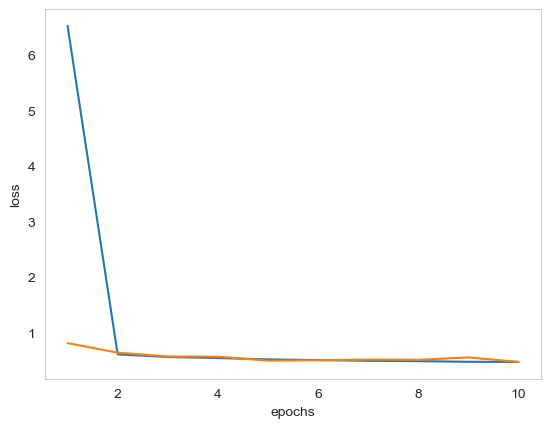

In [17]:
import matplotlib.pyplot as plt

epochs = np.arange(1, 11)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.grid(False)
plt.ylabel('loss')
plt.show()

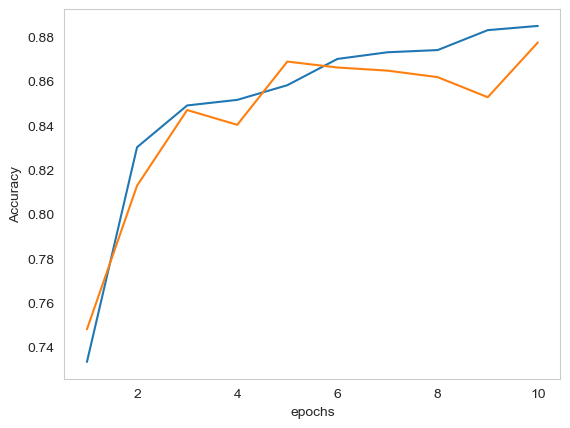

In [19]:
epochs = np.arange(1, 11)
plt.plot(epochs, history.history['acc'], label = 'Train')
plt.plot(epochs, history.history['val_acc'], label = 'Test')
plt.grid(False)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

#### Evaluate RNN model

In [20]:
model.load_weights('sentiment_rnn_checkpoint.h5')
model.evaluate(X_test, y_test)

391/391 [==============================] - 4s 10ms/step - loss: 0.4814 - acc: 0.8717


[0.4813605546951294, 0.8716800212860107]

In [23]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 169ms/step


array([[0.00383998],
       [0.01368196],
       [0.00214206],
       [0.9834624 ],
       [0.98053014],
       [0.97341835],
       [0.0270846 ],
       [0.9243102 ],
       [0.00608709],
       [0.8695248 ]], dtype=float32)